<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>
</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# Classification non supervisée avec <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 150px; display: inline" alt="Python"/></a> 

**Résumé**: Illustration des algorithmes de [classification non supervisée]() de `Scikit-learn` sur des données "jouet": réallocation dynamique ($k$-means), DBSCAN, mélange gaussien.

Tutoriel adapté de: https://github.com/ageron/handson-ml/blob/master/08_dimensionality_reduction.ipynb

*Machine Learning avec Scikit-Learn*, Mise en oeuvre et cas concrets, par Aurélien Géron.

## 1 Introduction
### 1.1 Objectif
Ce tutoriel permet d'illustrer sur des données simulées ou "jouet"les principales fonctions de classification non supervisées présentent dans la librairie `Scikit-learn`. L'algorithme $k$-means y est particulièrement développé ainsi que différentes versions de DBSCAN et les modèles de mélange gaussien. En revanche, la classification ascendante hiérarchique est à rechercher dans la librairie `scipy` L'usage de cet algorrithme est illustré dans un autre tutoriel.
 
### 1.2  Environnement pour python 3 ou 2

In [1]:
import numpy as np
# initialisation du générateur de nombres aléatoires
np.random.seed(42)
# Graphiques
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# Ignorer les warnings inutiles (cf. SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## 2 *K-means*
Cet algorithme et quelques unes de ses variantes sont testées sur des données simulées.

### 2.1 Génération des données

In [2]:
from sklearn.datasets import make_blobs

In [3]:
# Définition des centres
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
# Définition des dispersions
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
# Générations des *blobs*
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

Représentation graphique.

In [4]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

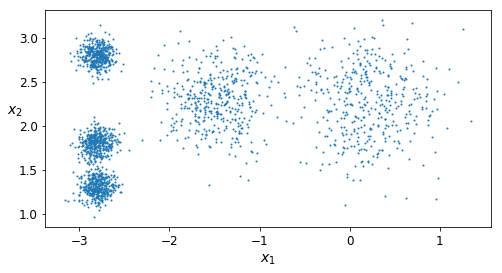

In [5]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### 2.1 Exécution de *K-means*
Le nombre de classes est supposé *a priori* connu. Ce choix est discuté plus loin.

In [6]:
from sklearn.cluster import KMeans

In [7]:
k = 5
# Choix des options
kmeans = KMeans(n_clusters=k, random_state=42)
# Exécution de l'algorithme
y_pred = kmeans.fit_predict(X)

In [8]:
# affichage des classes
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [9]:
# qui sont aussi dans la variables `y_pred`
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

La fonction `fit_predict` calcule aussi l'affectation à la classe dont le barycentre est le plus proche pour de nouvelles observations.

In [10]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

La fonction `transform` calcule elle les distances aux barycentres plutôt que l'affectation.

In [11]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

Affichage des barycentres des classes

In [12]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

### 4.2 Frontières des classes
Le tracé des frontières des classes profiut un diagramme de Voronoi.

In [13]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')

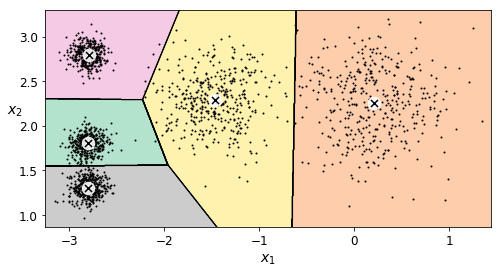

In [14]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Ce graphique montre bien que l'algorithme est typiquement basé sur des distances euclidiennes et ne prend pas en compte la dispersion plus ou moins grande des classes. Certains points à la frontière ne semblent pas affectés à la bonne classe.

### 4.3 Exécution multiple
Comme la convergence de *k-means* est locale, la variabilité des classes obtenues peut être évaluée en considérant plusieurs exécutions de l'algorithme à partir d'initialisation aléatoires différentes. 

In [15]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

Chaque exécution est limitée à une seule initilisation.

/home-local/pbesse/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


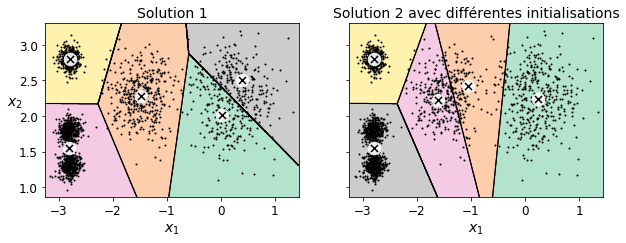

In [16]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 avec différentes initialisations")
plt.show()

L'évaluation de l'inertie du nuage permet de comparer les qualités de ces classifications.

In [17]:
kmeans.inertia_

211.5985372581684

Inertie qui est la somme des carrés des distances entre chaque observation et le barycentre de sa classe.

In [18]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

In [19]:
kmeans.score(X)

-211.59853725816856

Alors que le `score()` est moins l'inertie.

Une meilleure solution serait celle qui minimise l'inertie. La première exécution est donc meilleure car par défaut l'algorithme lance 10 exécutions  et conserve celle qui minimise l'inertie.

In [20]:
kmeans_rnd_init1.inertia_

223.29108572819035

In [21]:
kmeans_rnd_init2.inertia_

237.46249169442845

Exécution avec 10 initialisations

In [22]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10, algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=11, tol=0.0001, verbose=0)

qui fournit sans doute la meilleure classification connaissant le bon nombre de classes.

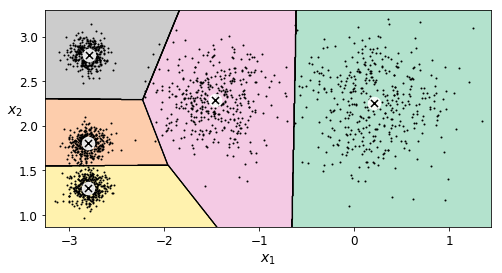

In [23]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

### 4.4 *K-means++*
[Arthur and Vassilvitskii (2006)](https://goo.gl/eNUPw6) ont proposé une autre initialisation des barycentres de l'algorithme:
* Choisir un centre $c_1$ aléatoirement, univormément dans les données, 
* Répéter $K-1$ fois: choisir un autre centre $c_k$, parmi des les données: $\mathbf{x}_i$ avec la probabilité $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ où $D(\mathbf{x}_i)$ est la distance entre $\mathbf{x}_i$ et le centre le plus proche déjà choisi. Cette probabilité assure que le nouveau centre est éloigné des autres centres précédemment choisis.

En principe ce procédé permet de réduire le nombre `n_init` d'initialisations et de donc de compenser le temps pris par cette procédure d'initialisation. 

Remarque: cette initialisation est obtenue par `init="k-means++"` qui est prise par défaut. Une "initialisation optimale"conduit à des résultats identiques.

In [24]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

### 4.5 Accélération de *K-means*
[Elkan (2003)](https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf) a proposé une accélération de l'algorithme en exploitant l'inégalité triangulaire pour économiser des calculs de distance: pour trois points A, B et C, la distance AC ≤ AB + BC. Cela permet de garder en mémoire des bornes inféreures et supérieures des distances entre observations et barycentres. L'option `algorithm="elkan"` exécute ce procédé par défaut mais seulement pour des données denses. Pour des données creuses (*sparse*) l'option `full` est utilisée par défaut.

In [26]:
%timeit -n 50 KMeans(algorithm="elkan").fit(X)

65.2 ms ± 847 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [27]:
%timeit -n 50 KMeans(algorithm="full").fit(X)

75.5 ms ± 2.42 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


### 4.6 Optimiser le nombre de classes
Un aute nombre de classes que celui initial par construction perturbe l'agorithme.

/home-local/pbesse/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


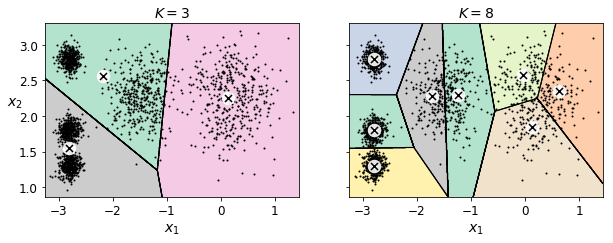

In [28]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$K=3$", "$K=8$")
plt.show()

In [29]:
kmeans_k3.inertia_

653.2167190021553

In [30]:
kmeans_k8.inertia_

119.11983416102879

Mais le critère d'inertie ne permet pas de choisir car celle-ci décroît mécaniquement avec le nombre de classes. Nénamoins la recherche d'un coude dans cette décroissance peut être une indication d'un nombre minimal de classes.

In [31]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

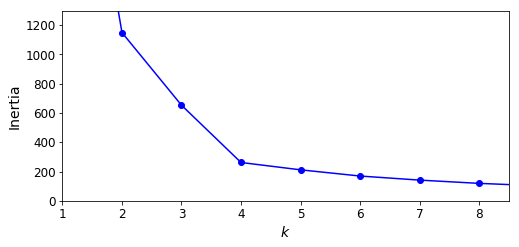

In [32]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 8.5, 0, 1300])
plt.show()

Attention, ces données "jouets" sont relativement "faciles" à segmenter en classes. des données réelles ne conduisent pas à des graphes aussi limpides. Le choix de 4 classes n'est pas mauvais en soit; la principale difficulté pour segmenter ces données réside dans les dispersions différentes des groupes.

Tracé des silouhettes des classes en fonction de $K$.

In [33]:
from sklearn.metrics import silhouette_score

In [34]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [35]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

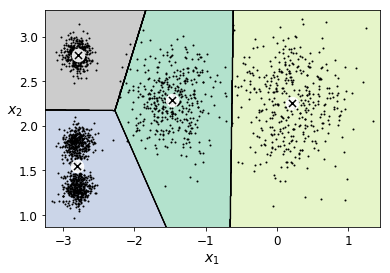

In [36]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

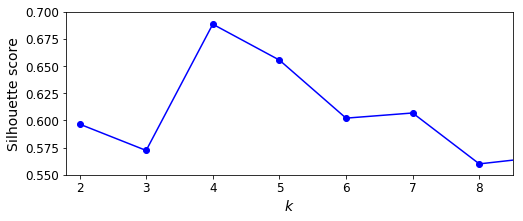

In [37]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

/home-local/pbesse/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home-local/pbesse/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


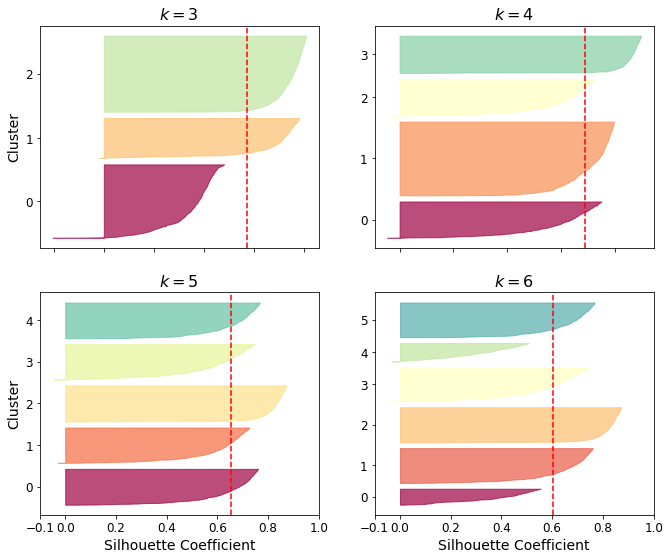

In [38]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        cmap = matplotlib.cm.get_cmap("Spectral")
        color = cmap(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom='off')

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
plt.show()

### 4.7 Limites de *K-means*
Cet algorithe favorise des classes sphériques. Il n'est donc pas adapté à des classes aux formes exotiques ni même elliptiques. Deux classifications sont comparées dont une, bonne, initialisée avec les centres connus.

In [39]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

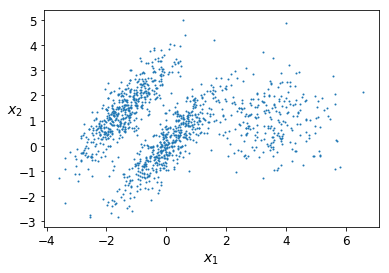

In [40]:
plot_clusters(X)

In [41]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

/home-local/pbesse/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


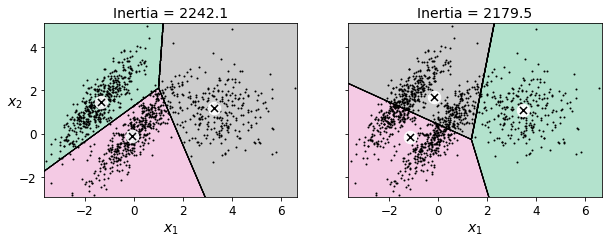

In [42]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)
plt.show()

## 5 DBSCAN
ALgorithmes plus particulièrement adapté à des classes bien distinctes même si de formes très exotiques. Il marche donc particulièrement bien sur des données synthétiques. Le choix des valeurs des paramètres: `eps, min_samples` de cet algorithme est délicat.

In [43]:
from sklearn.datasets import make_moons

In [44]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [45]:
from sklearn.cluster import DBSCAN

In [46]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [47]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [48]:
len(dbscan.core_sample_indices_)

808

In [49]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [50]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [51]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [52]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [53]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

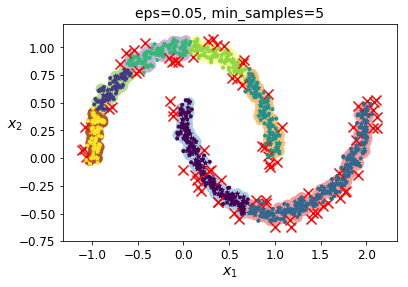

In [54]:
plot_dbscan(dbscan, X, size=100)

IndexError: index 0 is out of bounds for axis 0 with size 0

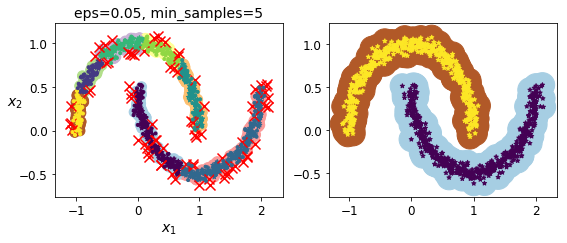

In [55]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)
plt.show()

## 6 Mélange gaussien

### 6.1 Iris de Fisher
Exemple typique sur des données classiques.
![Iris](03_iris.png)

In [56]:
from sklearn.datasets import load_iris
# from IPython.display import IFrame
# IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=300, height=200)

In [57]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

/home-local/pbesse/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


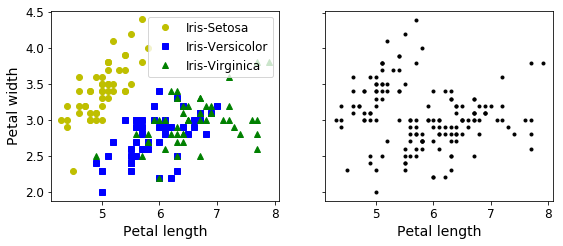

In [58]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft='off')
plt.show()

Un mélange gaussien est bien adapté à ces données.

In [59]:
from sklearn.mixture import GaussianMixture

In [60]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

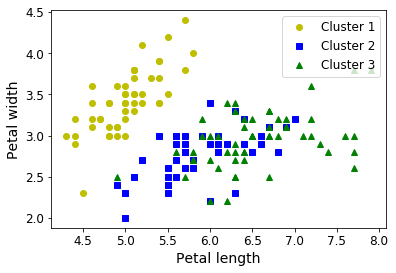

In [61]:
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()

### 6.2 Mélange gaussien des blobs
Cet algorithme est particulièrement adapté aux données précédemment générées.

In [62]:
np.sum(y_pred==y)

145

In [63]:
np.sum(y_pred==y) / len(y_pred)

0.9666666666666667

In [64]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [65]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=10, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

Valeurs des paramètres estimés par l'algorithme.

In [66]:
gm.weights_

array([0.20965228, 0.4000662 , 0.39028152])

In [67]:
gm.means_

array([[ 3.39909717,  1.05933727],
       [-1.40763984,  1.42710194],
       [ 0.05135313,  0.07524095]])

In [68]:
gm.covariances_

array([[[ 1.14807234, -0.03270354],
        [-0.03270354,  0.95496237]],

       [[ 0.63478101,  0.72969804],
        [ 0.72969804,  1.1609872 ]],

       [[ 0.68809572,  0.79608475],
        [ 0.79608475,  1.21234145]]])

La convergence est elle atteinte?

In [69]:
gm.converged_

True

En combien d'itérations?

In [70]:
gm.n_iter_

4

La fonction `predict()` permet de prédire l'appartenance d'une observation à une classe ou encore avec  `predict_proba()`, la probabilité d'appartenance à chacune des classes.

In [71]:
gm.predict(X)

array([2, 2, 1, ..., 0, 0, 0])

In [72]:
gm.predict_proba(X)

array([[2.32389467e-02, 6.77397850e-07, 9.76760376e-01],
       [1.64685609e-02, 6.75361303e-04, 9.82856078e-01],
       [2.01535333e-06, 9.99923053e-01, 7.49319577e-05],
       ...,
       [9.99999571e-01, 2.13946075e-26, 4.28788333e-07],
       [1.00000000e+00, 1.46454409e-41, 5.12459171e-16],
       [1.00000000e+00, 8.02006365e-41, 2.27626238e-15]])

De même que pour de nouvelles observations.

In [73]:
X_new, y_new = gm.sample(6)
X_new

array([[ 2.95400315,  2.63680992],
       [-1.16654575,  1.62792705],
       [-1.39477712, -1.48511338],
       [ 0.27221525,  0.690366  ],
       [ 0.54095936,  0.48591934],
       [ 0.38064009, -0.56240465]])

In [74]:
y_new

array([0, 1, 2, 2, 2, 2])

Estimation du logarithme de la fonction de densité entout point par `score_samples()`

In [75]:
gm.score_samples(X)

array([-2.60782346, -3.57106041, -3.33003479, ..., -3.51352783,
       -4.39802535, -3.80743859])

Graphique des frontières des classes et des contours des densités.

In [76]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')

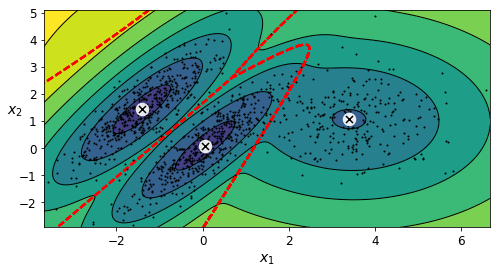

In [77]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.show()

En vue d'estimer des modèles plus parcimonieux, c'est-à-dire avec moins de paramètres, des contraintes peuvent être imposées aux matrices de covariance en spécifiant le paramètre `covariance_type`:

* `"full"` (defaut): pas de contrainte sur les matrices de covariance, chaque ellipsoïde peut avoir des formes spécifiques, 
* `"tied"`: même matrices de covariance ou même forme des nauges,
* `"spherical"`: nuages sphériques mais de diamètres différents,
* `"diag"`: nuages ellipsoïdaux parallèles mais de dimensions différentes.

In [78]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=10, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [79]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)


/home-local/pbesse/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


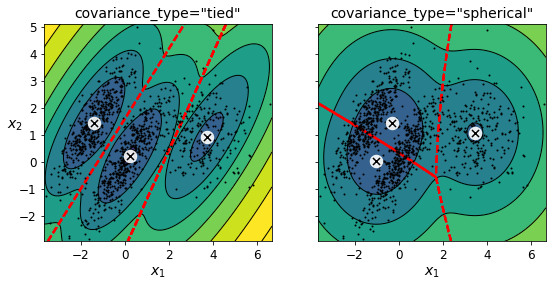

In [80]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)
plt.show()

/home-local/pbesse/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


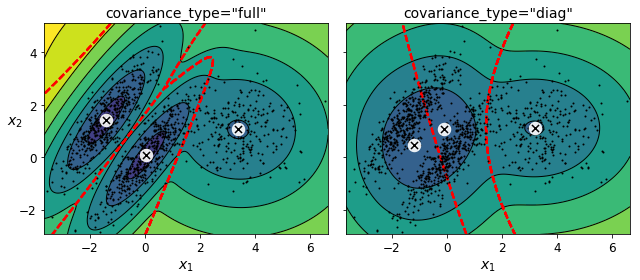

In [81]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

Comparer ces graphiques, lequel semble le plus adapté à la forme des nuages?

### 6.3 Détection d'anomalies

Comme la clasisficaiton ascendante hiérarchique, les mélanges gaussiens peuvent être utilisés pour [détecter des anomalies]() ou observations atypiques c'est-à-dire présentes dans des zones de faible densité. Un paramètre doit être réglé, il définit par exemple le taux d'anomalies à détecter.

In [82]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

/home-local/pbesse/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3461: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


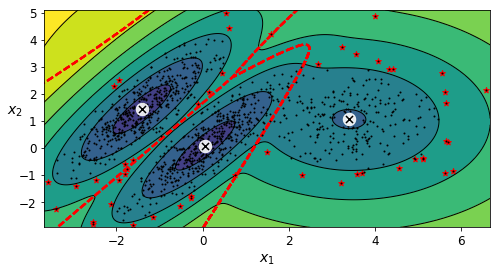

In [83]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(ymax=5.1)
plt.show()

### 6.4 Sélection de modèle
L'inertie, qui décroît avec le nombre de paramètres du modèles donc de classes, de même que le score de silouhette adapté à des nuages sphériques ne sont pas adaptés à l'optimisation dex choix de modèles: nombre de classes et contraintes sur les matrices de covariance. Le modèle de mélange est un modèle statistique usuel estimé par maximum de la log vraisemblance. La stratégie de sélection de modèle par pénalisation de la vraisemblance du modèle linéaire général peut être utilisée pour le modèle de mélange gaussien. Cette sytratégie conduit à la minimisation des critères BIC *(Bayesian Information Criterion)* et AIC *(Akaike Information Criterion)* qui introduisent une pénalisation fonction du nombre de paramètres.

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$ est la taille de l'échantillon,
* $p$ est le nombre de paramètres estimés dans le modèle: moyennes, éventuellement les matrices de covariance,
* $\hat L$ la log vraisemblance du modèle minimisée.

Minimiser le BIC ou l'AIC conduit trouver un "meilleur" équilibre entre qualité d'ajustement du modèle (Biais) et variance des paramètres.

In [84]:
gm.bic(X)

8189.74345832983

In [85]:
gm.aic(X)

8102.518178214792

Let's train Gaussian Mixture models with various values of $k$ and measure their BIC:

In [86]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [87]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

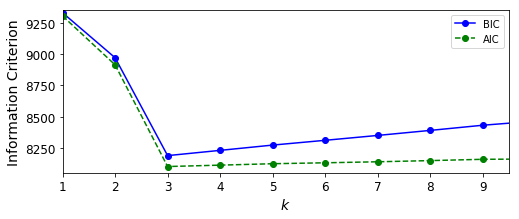

In [88]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.legend()
plt.show()

Chercher le meilleur choix pour le nombre de classes et le `covariance_type`:

In [89]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [90]:
best_k

3

In [91]:
best_covariance_type

'full'